In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('My Uber Drives - 2016.csv')
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [142]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*'],
      dtype='object')

In [145]:
data.rename(columns = {'START_DATE*' : 'mulai_tanggal', 
                       'END_DATE*' : 'akhir_tanggal', 
                       'CATEGORY*' : 'kategori', 
                       'START*' : 'mulai', 
                       'STOP*' : 'akhir', 
                       'MILES*' : 'mile' ,
                       'PURPOSE*' : 'tujuan'},
           inplace=True)

In [146]:
data

,mulai_tanggal,akhir_tanggal,kategori,mulai,akhir,mile,tujuan
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [147]:
data.shape

(1156, 7)

In [148]:
data.duplicated().sum()

1

In [149]:
data.drop_duplicates(inplace=True)

In [150]:
data.duplicated().sum()

0

In [151]:
data.duplicated().sum()

0

In [152]:
data.isnull().sum()

mulai_tanggal      0
akhir_tanggal      1
kategori           1
mulai              1
akhir              1
mile               0
tujuan           503
dtype: int64

In [153]:
data.isna().sum()

mulai_tanggal      0
akhir_tanggal      1
kategori           1
mulai              1
akhir              1
mile               0
tujuan           503
dtype: int64

In [154]:
data.dropna(inplace=True)

In [155]:
data.isna().sum()

mulai_tanggal    0
akhir_tanggal    0
kategori         0
mulai            0
akhir            0
mile             0
tujuan           0
dtype: int64

In [156]:
data.dtypes

mulai_tanggal     object
akhir_tanggal     object
kategori          object
mulai             object
akhir             object
mile             float64
tujuan            object
dtype: object

In [159]:
data['mulai_tanggal'] = pd.to_datetime(data['mulai_tanggal'])
data['mulai_tanggal'].dtypes

dtype('<M8[ns]')

In [160]:
data['akhir_tanggal'] = pd.to_datetime(data['akhir_tanggal'])
data['akhir_tanggal'].dtypes

dtype('<M8[ns]')

In [214]:
data.dtypes

mulai_tanggal    datetime64[ns]
akhir_tanggal    datetime64[ns]
kategori                 object
mulai                    object
akhir                    object
mile                    float64
tujuan                   object
contoh                   object
jenis                    object
dtype: object

In [163]:
data['mulai_tanggal'][0]

Timestamp('2016-01-01 21:11:00')

In [208]:
a = data.jenis.str.contains('Business')
df.loc[a, 'jenis'] = 'Bisnis'

a = data.jenis.str.contains('Personal')
data.loc[a, 'jenis'] = 'Individu'

data['jenis'].value_counts()

jenis
Bisnis      646
Individu      6
Name: count, dtype: int64

In [213]:
data['kategori'].value_counts()

kategori
Business    646
Personal      6
Name: count, dtype: int64

In [204]:
df.job_title.str.contains('Data Scientist')
df.loc[a, 'job_department'] = 'Data Scientist'

,mulai_tanggal,akhir_tanggal,kategori,mulai,akhir,mile,tujuan,contoh,jenis
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Business,Business
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Business,Business
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Business,Business
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Business,Business
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Business,Business
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Business,Business
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Business,Business
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Business,Business
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Business,Business


In [216]:
data[(data['mulai_tanggal'] == '2016-01-01-21:11:00')]

,mulai_tanggal,akhir_tanggal,kategori,mulai,akhir,mile,tujuan,contoh,jenis
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Business,Bisnis


## max month 

In [20]:
data['month'] = data['START_DATE*'].dt.month_name()
data['day'] = data['START_DATE*'].dt.day_name()

In [21]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,January,Wednesday


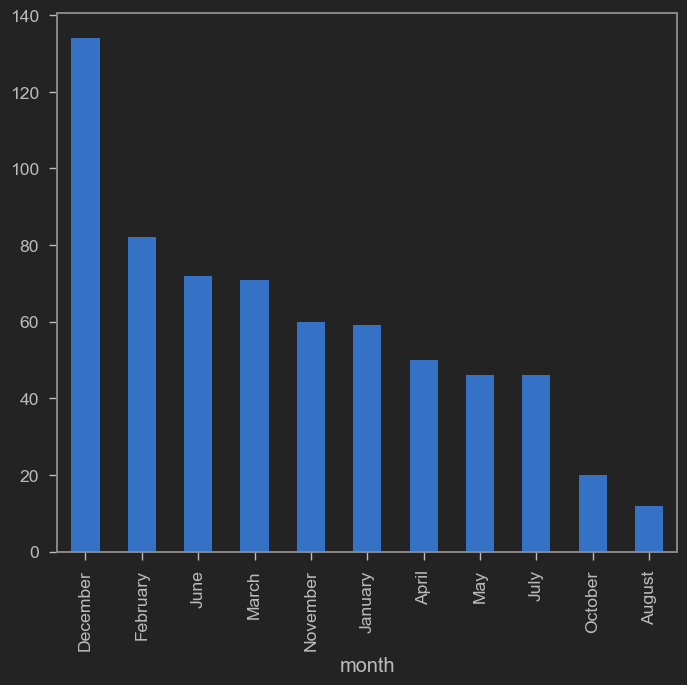

In [22]:
data['month'].value_counts().plot(kind='bar')

In [23]:
data['hour'] = data['START_DATE*'].dt.hour
data['minute'] = data['START_DATE*'].dt.minute

# Max Day

In [26]:
data['day'].value_counts()

day
Friday       125
Tuesday       93
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: count, dtype: int64

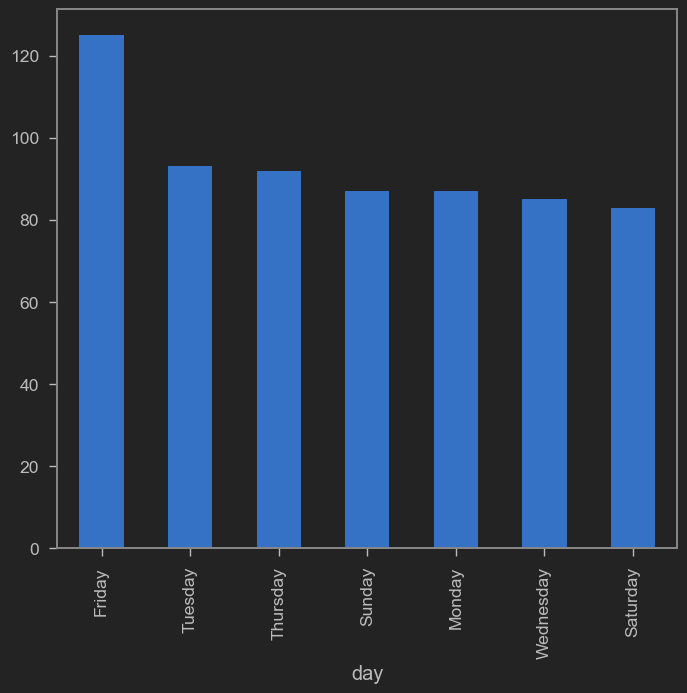

In [29]:
data['day'].value_counts().plot(kind='bar')

In [30]:
pivot_month_day = pd.crosstab(data['month'], data['day'])
pivot_month_day

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,19,0,9,4,7,8,3
August,0,4,1,3,1,2,1
December,18,17,21,10,30,15,23
February,14,9,7,19,20,8,5
January,10,6,3,5,9,13,13
July,8,13,5,5,2,9,4
June,16,11,9,10,1,9,16
March,19,8,12,11,11,7,3
May,7,8,5,6,4,8,8


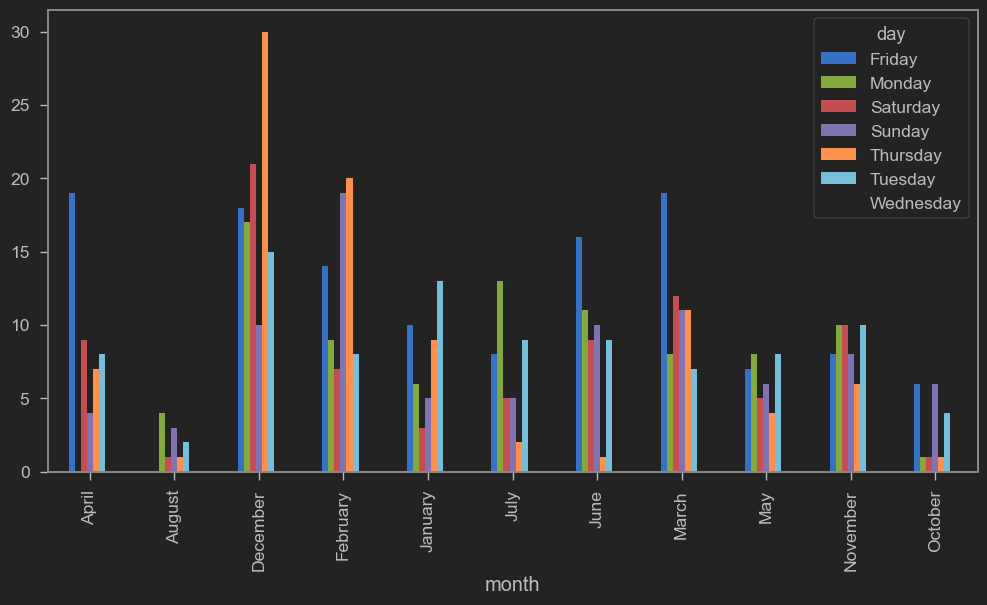

In [34]:
pivot_month_day.plot(kind='bar',figsize= (12,6) )

In [35]:
summary = data.groupby(['day', 'hour'], as_index=False).size()
summary

,day,hour,size
0,Friday,0,2
1,Friday,5,1
2,Friday,7,2
3,Friday,8,3
4,Friday,9,8
...,...,...,...
131,Wednesday,19,4
132,Wednesday,20,7
133,Wednesday,21,3
134,Wednesday,22,4


# Rush hour

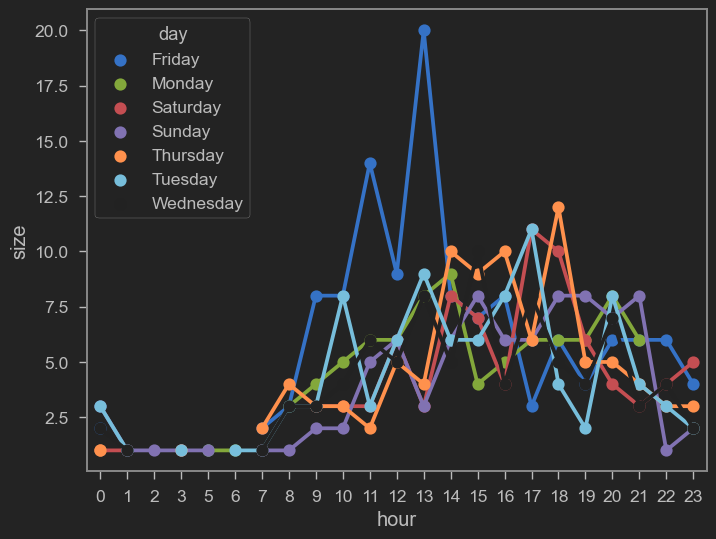

In [37]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.pointplot(data=summary, x='hour', y='size', hue='day')

In [68]:
data['CATEGORY*'].value_counts()

CATEGORY*
Business    646
Personal      6
Name: count, dtype: int64

In [53]:
Business = data[(data['CATEGORY*']=='Business')] 
Business['PURPOSE*'].value_counts()

PURPOSE*
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Airport/Travel       3
Name: count, dtype: int64

In [140]:
pd.crosstab(data['PURPOSE*',data.['month'] )

SyntaxError: invalid syntax (3480952673.py, line 1)

In [79]:
Max_miles = Business[(Business['MILES*'] >= 10.97 )].head(10)
Max_miles

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,month,day,hour,minute
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,Wednesday,14,42
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,January,Sunday,12,17
22,2016-01-12 16:02:00,2016-01-12 17:00:00,Business,New York,Queens County,15.1,Meeting,January,Tuesday,16,2
23,2016-01-13 13:54:00,2016-01-13 14:07:00,Business,Downtown,Gulfton,11.2,Meeting,January,Wednesday,13,54
24,2016-01-13 15:00:00,2016-01-13 15:28:00,Business,Gulfton,Downtown,11.8,Meeting,January,Wednesday,15,0
25,2016-01-14 16:29:00,2016-01-14 17:05:00,Business,Houston,Houston,21.9,Customer Visit,January,Thursday,16,29
34,2016-01-20 10:36:00,2016-01-20 11:11:00,Business,Cary,Raleigh,17.1,Meeting,January,Wednesday,10,36
35,2016-01-20 11:48:00,2016-01-20 12:19:00,Business,Fayetteville Street,Umstead,15.1,Meeting,January,Wednesday,11,48
36,2016-01-20 13:25:00,2016-01-20 14:19:00,Business,Raleigh,Cary,40.2,Customer Visit,January,Wednesday,13,25
46,2016-01-27 10:19:00,2016-01-27 10:48:00,Business,Cary,Raleigh,18.7,Customer Visit,January,Wednesday,10,19


In [80]:
data.columns

Index(['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*',
       'PURPOSE*', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [84]:
Max_miles[['START_DATE*', 'END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*']]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5
22,2016-01-12 16:02:00,2016-01-12 17:00:00,Business,New York,Queens County,15.1
23,2016-01-13 13:54:00,2016-01-13 14:07:00,Business,Downtown,Gulfton,11.2
24,2016-01-13 15:00:00,2016-01-13 15:28:00,Business,Gulfton,Downtown,11.8
25,2016-01-14 16:29:00,2016-01-14 17:05:00,Business,Houston,Houston,21.9
34,2016-01-20 10:36:00,2016-01-20 11:11:00,Business,Cary,Raleigh,17.1
35,2016-01-20 11:48:00,2016-01-20 12:19:00,Business,Fayetteville Street,Umstead,15.1
36,2016-01-20 13:25:00,2016-01-20 14:19:00,Business,Raleigh,Cary,40.2
46,2016-01-27 10:19:00,2016-01-27 10:48:00,Business,Cary,Raleigh,18.7


In [127]:
data['PURPOSE*'].nunique()

10

In [128]:
data['PURPOSE*'].value_counts()

PURPOSE*
Meeting            186
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

In [221]:
data

,mulai_tanggal,akhir_tanggal,kategori,mulai,akhir,mile,tujuan,contoh,jenis
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Business,Bisnis
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Business,Bisnis
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Business,Bisnis
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Business,Bisnis
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,Business,Bisnis
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,Business,Bisnis
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,Business,Bisnis
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,Business,Bisnis
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,Business,Bisnis
